In [1]:
import pandas as pd
import numpy as np


In [2]:
import re
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score,classification_report

from sklearn.pipeline import Pipeline

In [3]:
data=pd.read_csv("/content/COVIDFakeNewsData.csv")
data.head()

,headlines,outcome
0,A post claims compulsory vacination violates t...,0
1,A photo claims that this person is a doctor wh...,0
2,Post about a video claims that it is a protest...,0
3,All deaths by respiratory failure and pneumoni...,0
4,The dean of the College of Biologists of Euska...,0


In [4]:
data.outcome.value_counts()

0    9727
1     474
Name: outcome, dtype: int64

In [5]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
data['headlines'] = data['headlines'].str.replace('[^\w\s]','')
data['headlines'] = data['headlines'].str.lower()

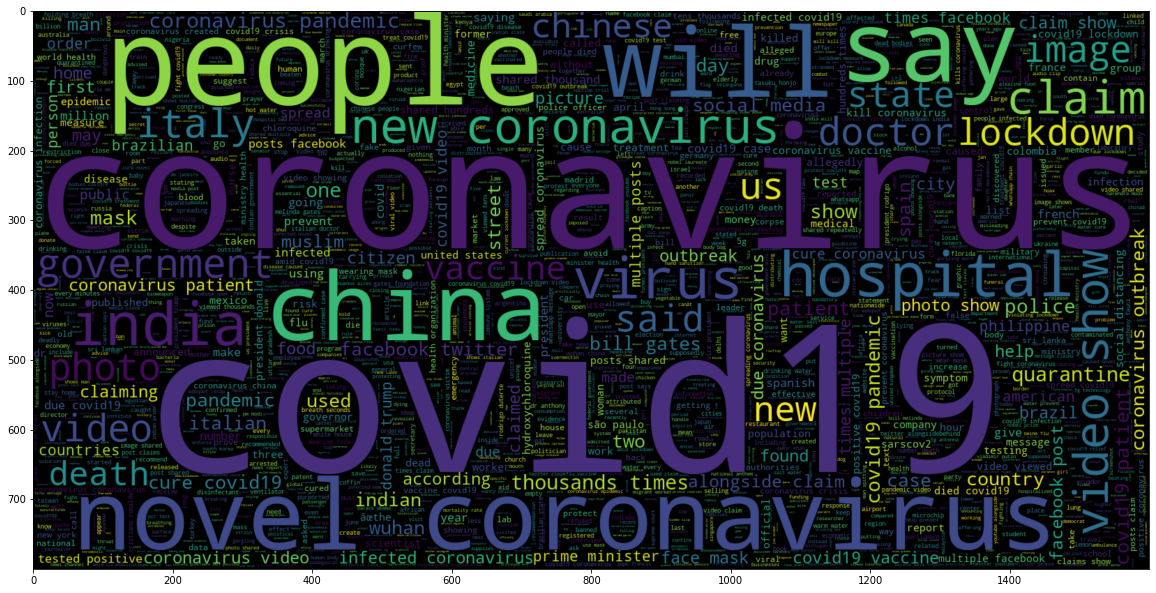

In [7]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(data[data.outcome == 0].headlines))
plt.imshow(wc, interpolation = 'bilinear')

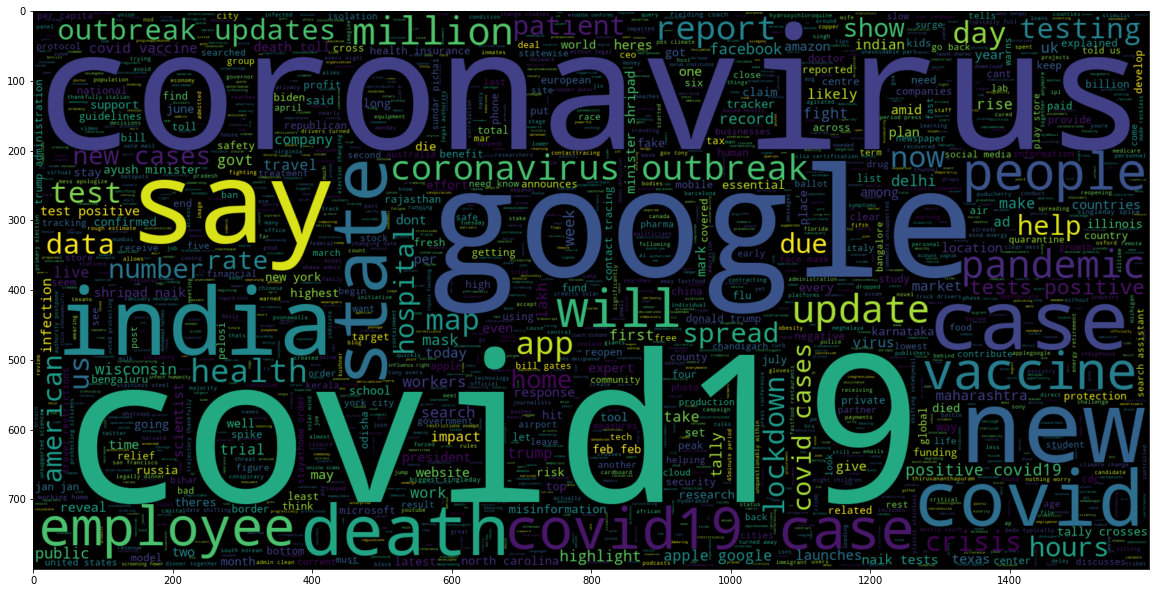

In [8]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(data[data.outcome == 1].headlines))
plt.imshow(wc, interpolation = 'bilinear')

In [9]:
y=data.outcome
X=data.headlines

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=102,stratify=y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7140,) (7140,)
(3061,) (3061,)


Cleaning Data using NLP Techniques

In [87]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.80)  
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [88]:
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over_train, y_over_train = oversample.fit_resample(tfidf_train, y_train)
X_over_test, y_over_test = oversample.fit_resample(tfidf_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Implementing Classification Algorithm

Support Vector Machine

In [89]:
support_vector_machine=svm.SVC(kernel='linear')

In [90]:
support_vector_machine.fit(X_over_train, y_over_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [91]:
pred3 = support_vector_machine.predict(X_over_test)

print('Accuracy of SVM on test set:',accuracy_score(y_over_test, pred3))

Accuracy of SVM on test set: 0.8604385564184559


In [92]:
print(classification_report(y_over_test, pred3))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2919
           1       0.97      0.60      0.74      1459

    accuracy                           0.86      4378
   macro avg       0.90      0.80      0.82      4378
weighted avg       0.88      0.86      0.85      4378



In [98]:
import pickle
pickle.dump(support_vector_machine, open('model.pkl','wb'))
pickle.dump(tfidf_vectorizer, open("tfidf.pkl", "wb"))